In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from templates import TEMPLATES

In [2]:
img = cv2.imread("data/baseball/ball_frame_0.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

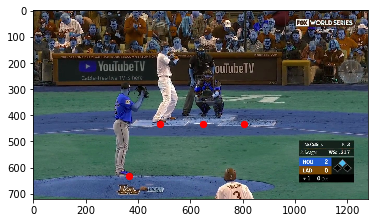

In [3]:
plt.imshow(img)
plt.scatter(x=[650], y=[433], c='r', s=40)  # Home plate
plt.scatter(x=[485], y=[433], c='r', s=40)  # Right batter's box
plt.scatter(x=[805], y=[433], c='r', s=40)  # Left batter's box
plt.scatter(x=[366], y=[633], c='r', s=40)  # Pitcher's mound
plt.show()

In [4]:
# This is an example of what a template looks like
TEMPLATES["baseball"]

{'home_plate': array([0., 0., 0.], dtype=float32),
 'left_batters': array([-1.,  0.,  0.], dtype=float32),
 'right_batters': array([1., 0., 0.], dtype=float32),
 'pitchers_mound_center': array([ 0.  , 18.39,  0.  ], dtype=float32),
 'pitchers_mound_left': array([-0.4572, 18.39  ,  0.    ], dtype=float32),
 'first_base': array([18.39, 18.39,  0.  ], dtype=float32),
 'second_base': array([ 0.  , 36.78,  0.  ], dtype=float32),
 'third_base': array([-18.39,  18.39,   0.  ], dtype=float32)}

In [5]:
# Create the objpoints and imgpoints. This should be wrapped up in a dict or maybe a class
objpoints = np.array([TEMPLATES["baseball"]["home_plate"], 
                      TEMPLATES["baseball"]["right_batters"],
                      TEMPLATES["baseball"]["left_batters"],
                      TEMPLATES["baseball"]["pitchers_mound_center"]])
imgpoints = np.array([np.array([650, 433]), 
                      np.array([485, 433]),
                      np.array([805, 433]),
                      np.array([366, 633])])

# Reshape
objpoints = objpoints.reshape(1,-1, 3).astype('float32')
imgpoints = imgpoints.reshape(1,-1, 2).astype('float32')

In [6]:
# Calibrate camera, get mtx
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None,None) # )

h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

In [7]:
# Undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# crop the image, from https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_calibration/py_calibration.html#calibration
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]

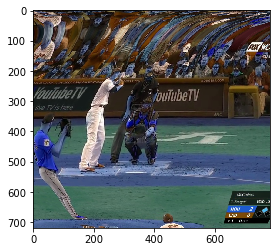

In [8]:
# Calibrated image
plt.imshow(dst)